<a href="https://colab.research.google.com/github/Varagos/CarEdison2020/blob/master/supervised-learning/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Στοιχεία Ομάδος**  
Ομάδα με αριθμό 74:  
<small>
ΓΚΕΡΓΚΕΣ ΜΑΡΚΟΣ (03117870)  
ΑΓΓΕΛΟΥ ΣΤΥΛΙΑΝΟΣ (03117863)
</small>




In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install --upgrade matplotlib # Κάνουμε update την matplotlib

In [ ]:
import pandas as pd

df = pd.read_csv("dermatology.data", header=None)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3


* Το dataset περιέχει δεδομένα από ασθενείς που πάσχουν από μια δερματολογική ασθένεια που ανήκει στην κατηγορία erythemato-squamous. Σκοπός μας είναι να διαγνώσουμε συγκεκριμένα από ποια ασθένεια πάσχει ένας ασθενής δωσμένουν συγκεκριιμένων χαρακτηριστικών. Στα δεδομένα οι πιθανές ασθένεις είναι 6 (psoriasis, seboreic dermatitis ,lichen planus ,pityriasis rosea,cronic dermatitis,pityriasis rubra pilaris) 

* Δεν κάναμε κάποια μετατροπή στο αρχείο plain text
* Έχουμε 366 δείγματα και 34 χαρακτηριστικά, όλα διατεταγμένα, εκτός από ένα που είναι boolean(οικογενειακό ιστορικό) και του οποίου η μετατροπή σε διατεταγμένο έχει γίνει ήδη στο dataset.

* Δεν έχουμε ούτε επικεφαλίδες, ούτε αρίιθμηση γραμμών.
* Οι ετικέτες των κλάσεων απεικονίζονται με αριθμούς από το 1 έως 6 με την εξής αντιστοίχιση
1 - psoriasis,
2 - seboreic dermatitis
3 - lichen planus
4 - pityriasis rosea
5 - cronic dermatitis
6 - pityriasis rubra pilaris
Και βρίσκονται στην τελευταία κολώνα (34 index-0) 

* Υπάρχουν 8 δείγματα που έχουν έστω 1 απουσιάζουσα τιμή(ηλικίας), επομένως το συνολικό ποσοστό τους επί των συνολικών δειγμάτων είναι 2.3 %
* Υπάρχουν μεγάλες αποκλίσεις και το dataset δεν είναι ξεκάθαρα ισορροπημένο, αφού υπάρχουν κλάσεις με παραπάνω από διπλάσια δείγματα από άλλες

|   | Κλασεις                  | Αριθμος δειγματων | Ποσοστο επι συνολου |
|---|--------------------------|-------------------|---------------------|
| 1 | psoriasis                | 112               | 33 %                |
| 2 | seboreic dermatitis      | 61                | 18 %                |
| 3 | lichen planus            | 72                | 21 %                |
| 4 | pityriasis rosea         | 49                | 14 %                |
| 5 | cronic dermatitis        | 52                | 15 %                |
| 6 | pityriasis rubra pilaris | 20                | 6 %                 |

In [ ]:
# Remove instances with missing values
derm_df = df[df[33] != '?']
derm_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3


In [ ]:
labels = derm_df[34]
labels

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: 34, Length: 358, dtype: int64

Στο σημείο αυτό, αφαιρούμε τα δείγματα που περιέχουν NaN ή απουσιάζουσες τιμές, και διαχωρίζουμε το dataset σε train και test set, με αντίστοιχες αναλογίες 70%-30%. Αξίζει να σημειωθεί ότι δε κάνουμε shuffle κατά τον διαχωρισμό καθώς το dataset που έχουμε είναι μικρό.

In [ ]:
from sklearn.model_selection import train_test_split
features = derm_df.drop(columns=[34])
labels = derm_df[[34]]
print(features.shape)
print(labels.shape)
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3)
# train, test, train_labels, test_labels

(358, 34)
(358, 1)


Όσα δείγματα είχαν απουσιάζουσα τιμή αφαιρέθηκαν

In [ ]:

from enum import Enum
class clf(Enum):
  dummy = 'Dummy'
  bayes = 'Gaussian Naive Bayes'
  knn = 'k-nearest neighbors'
  lr = 'Logistic Regression'
print(clf.lr.value)

Logistic Regression


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression




classifiers_accuracy = {}
classifiers_f1_score = {}
dc_default = DummyClassifier()
#εκπαιδεύουμε τον ταξινομητή 
model = dc_default.fit(train, train_labels)
#παράγουμε προβλέψεις για τα δεδομένα ελέγχου
preds = dc_default.predict(test)

classifiers_accuracy[clf.dummy.value] = dc_default.score(test, test_labels)
classifiers_f1_score[clf.dummy.value] = f1_score(test_labels, preds, average='macro')


# Gaussian Naive Bayes
gnb_default = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
model = gnb_default.fit(train, train_labels)
gnb_preds = gnb_default.predict(test)
# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy. Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
classifiers_accuracy[clf.bayes.value] = gnb_default.score(test, test_labels)
classifiers_f1_score[clf.bayes.value] = f1_score(test_labels, gnb_preds, average='macro')


# K nearest neighbors
knn_default = neighbors.KNeighborsClassifier()
knn_default.fit(train, train_labels)
knn_preds = knn_default.predict(test)
print(classification_report(test_labels, preds))
classifiers_accuracy[clf.knn.value] = knn_default.score(test, test_labels)
classifiers_f1_score[clf.knn.value] = f1_score(test_labels, knn_preds, average='macro')

# Logistic Regression based classifier
logisticRegr = LogisticRegression()
logisticRegr.fit(train, train_labels)
lr_preds = logisticRegr.predict(test)
classifiers_accuracy[clf.lr.value] = logisticRegr.score(test, test_labels)
classifiers_f1_score[clf.lr.value] = f1_score(test_labels, lr_preds, average='macro')

print('accuracy score', classifiers_accuracy)
print('f1 score', classifiers_f1_score)

              precision    recall  f1-score   support

           1       0.23      1.00      0.38        25
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00         6

    accuracy                           0.23       108
   macro avg       0.04      0.17      0.06       108
weighted avg       0.05      0.23      0.09       108

accuracy score {'Dummy': 0.23148148148148148, 'Gaussian Naive Bayes': 0.8611111111111112, 'k-nearest neighbors': 0.8425925925925926, 'Logistic Regression': 0.9629629629629629}
f1 score {'Dummy': 0.06265664160401004, 'Gaussian Naive Bayes': 0.8311337355455003, 'k-nearest neighbors': 0.8256599722116963, 'Logistic Regression': 0.9595238095238096}


|   | Classifier          | Accuracy            | F1 score            |
|---|---------------------|---------------------|---------------------|
| 1 | Dummy               | 0.25925925925925924 | 0.06862745098039215 |
| 2 | GaussianNavie Bayes | 0.8796296296296297  | 0.8416492562344166  |
| 3 | KN Neighbors        | 0.7777777777777778  | 0.7722128388604362  |
| 4 | Logistic Regression | 0.9814814814814815  | 0.9822595704948647  |

**k-nearest neighbors classifier**  
Ο kNN δεν έχει πρακτικά φάση εκπαίδευσης. Ωστόσο, για να ταξινομήσουμε ένα νέο δείγμα στην φάση test, πρέπει να συγκρίνουμε την απόστασή του με κάθε δείγμα του train set. Αυτό σημαίνει ότι για την ταξινόμηση είναι απαραίτητα όλα τα δείγματα εκπαίδευσης (εξού και η ονομασία "instance-based", ενώ στον Naive Bayes χρειαζόμαστε μόνο τις παραμέτρους $μ$ και $σ^2$). Αυτό σημαίνει ότι ο kNN είναι πιο απαιτητικός και σε χώρο (αποθήκευση όλων των δειγμάτων) και σε χρόνο (υπολογισμός όλων των αποστάσεων για κάθε νέο δείγμα).

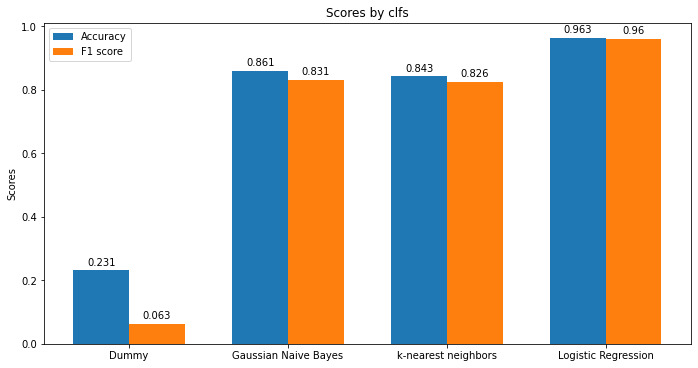

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = classifiers_accuracy.keys()
y1 = np.around(list(classifiers_accuracy.values()), decimals=3) 
y2 = np.around(list(classifiers_f1_score.values()), decimals=3)
tick_labels = list(x)

x = np.arange(len(classifiers_accuracy.keys()))  # the label locations

fig, ax = plt.subplots()
width = 0.35
rects1 = ax.bar(x - width/2, y1, width, label='Accuracy')
rects2 = ax.bar(x + width/2, y2, width, label='F1 score')

ax.set_ylabel('Scores')
ax.set_title('Scores by clfs')
ax.set_xticks(x, tick_labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
fig.set_size_inches(10.5, 5.5)

plt.show()



#Sxoliamos


## Βελτιστοποίηση ταξινομητών  
Αρχικά, ελέγχουμε αν τα δεδομένα μας είναι ήδη κανονικοποιημένα regularized.



In [ ]:
!pip install --upgrade imbalanced-learn

     0   1   2   3   4   5   6   7   8   ...  25  26  27  28  29  30  31  32  33
136   2   2   0   2   1   0   0   0   0  ...   0   0   3   0   0   0   3   0  70
311   2   2   2   1   0   0   0   0   2  ...   2   0   0   0   0   0   2   0  36
222   1   1   1   3   0   0   0   0   0  ...   0   0   0   0   0   0   2   0  18
269   3   2   2   0   0   0   0   0   0  ...   1   0   2   0   0   0   2   0  35
153   2   2   2   0   0   0   0   0   1  ...   0   0   0   0   0   0   1   0  52
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
146   3   2   0   3   0   0   0   0   0  ...   0   0   3   0   0   0   2   0  52
54    0   1   0   2   0   0   0   0   0  ...   0   0   0   0   0   0   3   0  51
102   3   3   3   2   2   0   0   0   2  ...   2   0   0   0   0   0   3   0  43
340   2   2   3   0   0   0   0   0   2  ...   2   0   0   0   0   0   2   0  33
113   2   2   3   2   3   3   0   3   0  ...   0   2   2   2   0   0   2   2  40

[250 rows x 34 columns]


In [ ]:
def checkScaled(data):
  print(data.shape)
  for i in range(data.shape[0]):
    for j in range(data.shape[1]):
      if (data[i][j] < 0 or data[i][j] > 1):
        print("Not regularized data")
        return
  print("Regularized data")

    
checkScaled(np.array(train))

(250, 34)
Not regularized data


Βλέπουμε πως δεν είναι κανονικοποιημένα και τα κανονικοποιούμε.

In [ ]:
def regularization(data):
  return ( data - np.min(data) ) / ( np.max(data) - np.min(data) )

np_train = np.array(train).astype(np.int32)
np_test = np.array(test).astype(np.int32)

# Regularization, Scaled
X_train_scaled = regularization(np_train)
X_test_scaled = regularization(np_test)
Y_train = train_labels
Y_test = test_labels

checkScaled(X_train_scaled)


(250, 34)
Regularized data


Χρησιμοποιήσουμε τη συνάρτηση VarianceThreshold για να αφαιρέσουμε τα χαρακτηριστικά στο training set που έχουν γενικά χαμηλή διακύμανση και δε προσφέρουν σημαντική πληροφορία. Θα δοκιμάσουμε διαφορετικά κατώφλια στο GridSearch με βήμα 0.1.  

---

Θα χρησιμοποιήσουμε αρκετές διαφορετικές εκδοχές του PCA, δημιουργώντας έτσι διαφορετικά datasets, με n_components από το 2 εώς το 60 με βήμα 2 για κάθε dataset. 




In [ ]:
import warnings 
warnings.filterwarnings('ignore')
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# φέρνουμε τις γνωστές κλάσεις για προεπεξεργασία του dataset
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

import time

# αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()


train_variance = train.var(axis=0)
print(f"Μέγιστο variance {np.max(train_variance)}")
#προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
vthreshold = np.arange(0, 0.6, 0.1)
n_components = np.arange(2, 22, 2)


Μέγιστο variance 1.3166907630522113


In [ ]:
estimators_accuracy_optimal_params={}
estimators_accuracy_optimal_preds={}

estimators_accuracy_optimal_params_fit_time={}
estimators_accuracy_optimal_params_test_time={}

def timeAccuracyEstimatorTrainAndTest(estimator, clf_name):
  fit_start_time = time.time()
  estimator.fit(train, train_labels)
  fit_duration = time.time() - fit_start_time

  test_start_time = time.time()
  preds = estimator.predict(test)
  test_duration = time.time() - test_start_time
  
  estimators_accuracy_optimal_params[clf_name] = estimator.best_params_
  estimators_accuracy_optimal_preds[clf_name] = preds
  estimators_accuracy_optimal_params_fit_time[clf_name] = fit_duration
  estimators_accuracy_optimal_params_test_time[clf_name] = test_duration


dummy_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_default)], memory = 'tmp')
dummy_estimator = GridSearchCV(dummy_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,), cv=10, scoring='accuracy', n_jobs=-1)
timeAccuracyEstimatorTrainAndTest(dummy_estimator, clf.dummy.value)

print(dummy_estimator.best_estimator_)
print(dummy_estimator.best_params_)


Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=2)),
                ('dummy', DummyClassifier())])
{'pca__n_components': 2, 'selector__threshold': 0.0}


In [ ]:
# Βελτιστος για Gaussian Naive Bayes
gaussian_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gaussian_naive_bayes', gnb_default)], memory = 'tmp')

gaussian_estimator = GridSearchCV(gaussian_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,), cv=10, scoring='accuracy', n_jobs=-1)
timeAccuracyEstimatorTrainAndTest(gaussian_estimator, clf.bayes.value)


In [ ]:
#Βέλτιστος για KNN
k = np.arange(3, 30, 2)

knn_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', knn_default)], memory = 'tmp')
knn_estimator = GridSearchCV(knn_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='accuracy', n_jobs=-1)

timeAccuracyEstimatorTrainAndTest(knn_estimator, clf.knn.value)

In [ ]:
# Βέλτιστος γιια Logistic Regression (LR).
logisticRegr = LogisticRegression()

lr_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('logistic', logisticRegr)], memory = 'tmp')

lr_estimator = GridSearchCV(lr_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,), cv=10, scoring='accuracy', n_jobs=-1)
timeAccuracyEstimatorTrainAndTest(lr_estimator, clf.lr.value)


In [ ]:
# Ίδια διαδικασία για την f1 μετρική
estimators_f1_macro_optimal_params={}
estimators_f1_macro_optimal_preds={}

estimators_f1_macro_optimal_params_fit_time={}
estimators_f1_macro_optimal_params_test_time={}

def timeF1MacroEstimatorTrainAndTest(estimator, clf_name):
  fit_start_time = time.time()
  estimator.fit(train, train_labels)
  fit_duration = time.time() - fit_start_time

  test_start_time = time.time()
  preds = estimator.predict(test)
  test_duration = time.time() - test_start_time

  estimators_f1_macro_optimal_params[clf_name] = estimator.best_params_
  estimators_f1_macro_optimal_preds[clf_name] = preds
  estimators_f1_macro_optimal_params_fit_time[clf_name] = fit_duration
  estimators_f1_macro_optimal_params_test_time[clf_name] = test_duration

# Dummy

dummy_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', dc_default)], memory = 'tmp')
dummy_estimator = GridSearchCV(dummy_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,), cv=10, scoring='f1_macro', n_jobs=-1)

timeF1MacroEstimatorTrainAndTest(dummy_estimator, clf.dummy.value)


# Gaussian Naive Bayes

gaussian_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gaussian_naive_bayes', gnb_default)], memory = 'tmp')
gaussian_estimator = GridSearchCV(gaussian_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,), cv=10, scoring='f1_macro', n_jobs=-1)

timeF1MacroEstimatorTrainAndTest(gaussian_estimator, clf.bayes.value)


#Βέλτιστος για KNN
knn_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', knn_default)], memory = 'tmp')
knn_estimator = GridSearchCV(knn_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='f1_macro', n_jobs=-1)

timeF1MacroEstimatorTrainAndTest(knn_estimator, clf.knn.value)


# Βέλτιστος γιια Logistic Regression (LR).
logisticRegr = LogisticRegression()

lr_pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('logistic', logisticRegr)], memory = 'tmp')
lr_estimator = GridSearchCV(lr_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components,), cv=10, scoring='f1_macro', n_jobs=-1)

timeF1MacroEstimatorTrainAndTest(lr_estimator, clf.lr.value)


|   |      Classifier     | Accuracy (pipelined) | Train time(sec) | Test time | Accuracy (default) |
|---|:-------------------:|:--------------------:|:---------------:|:---------:|:------------------:|
| 1 |        Dummy        |         0.23         |      20.69      |   0.0028  |        0.25        |
| 2 | GaussianNavie Bayes |         0.94         |      20.65      |   0.0029  |        0.87        |
| 3 |     KN Neighbors    |         0.94         |       299       |   0.0105  |        0.77        |
| 4 | Logistic Regression |         0.92         |       32.7      |   0.0039  |        0.98        |


---

|   |      Classifier     | F1 score (pipelined) | Train time(sec) | Test time(sec) | F1 score (default) |
|---|:-------------------:|:--------------------:|:---------------:|:--------------:|:------------------:|
| 1 |        Dummy        |         0.06         |      19.52      |     0.0028     |        0.25        |
| 2 | GaussianNavie Bayes |         0.92         |      20.22      |     0.0025     |        0.92        |
| 3 |     KN Neighbors    |         0.94         |       302       |     0.0113     |        0.94        |
| 4 | Logistic Regression |         0.93         |       33.4      |     0.0049     |        0.93        |


Acurracy optimized params

Dummy -> {'pca__n_components': 2, 'selector__threshold': 0.0}
Gaussian Naive Bayes -> {'pca__n_components': 14, 'selector__threshold': 0.2}
k-nearest neighbors -> {'kNN__n_neighbors': 5, 'pca__n_components': 16, 'selector__threshold': 0.2}
Logistic Regression -> {'pca__n_components': 8, 'selector__threshold': 0.2}

F1 score optimized params

Dummy -> {'pca__n_components': 2, 'selector__threshold': 0.0}
Gaussian Naive Bayes -> {'pca__n_components': 14, 'selector__threshold': 0.2}
k-nearest neighbors -> {'kNN__n_neighbors': 5, 'pca__n_components': 16, 'selector__threshold': 0.2}
Logistic Regression -> {'pca__n_components': 10, 'selector__threshold': 0.2}


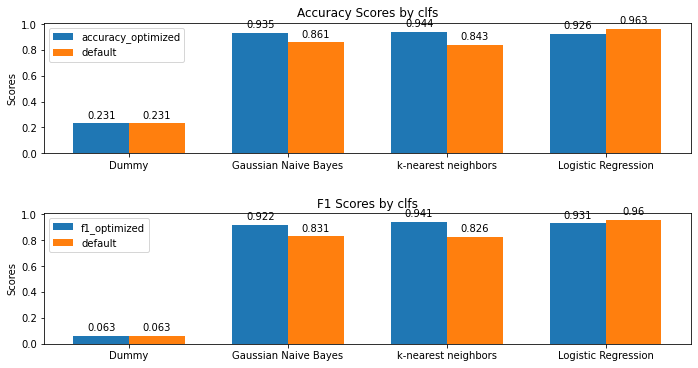

In [ ]:
print('\nAcurracy optimized params\n')
for (key, value) in estimators_accuracy_optimal_params.items():
  print(key, '->', value)


print('\nF1 score optimized params\n')

for (key, value) in estimators_f1_macro_optimal_params.items():
  print(key, '->', value)
# f1_score(test_labels, lr_preds, average='macro')



y1 = np.around([accuracy_score(test_labels,pred) for pred in estimators_accuracy_optimal_preds.values()], decimals=3) 
y2 = np.around(list(classifiers_accuracy.values()), decimals=3)
tick_labels = list(estimators_accuracy_optimal_preds.keys())

x = np.arange(len(classifiers_accuracy.keys()))  # the label locations

fig, ax = plt.subplots(2,1)
width = 0.35
rects1 = ax[0].bar(x - width/2, y1, width, label='accuracy_optimized')
rects2 = ax[0].bar(x + width/2, y2, width, label='default')

ax[0].set_ylabel('Scores')
ax[0].set_title('Accuracy Scores by clfs')
ax[0].set_xticks(x, tick_labels)
ax[0].legend()

ax[0].bar_label(rects1, padding=3)
ax[0].bar_label(rects2, padding=3)




y1 = np.around([f1_score(test_labels,pred, average='macro') for pred in estimators_f1_macro_optimal_preds.values()], decimals=3) 
y2 = np.around(list(classifiers_f1_score.values()), decimals=3)
tick_labels = list(estimators_f1_macro_optimal_preds.keys())

x = np.arange(len(classifiers_f1_score.keys()))  # the label locations

width = 0.35
rects1 = ax[1].bar(x - width/2, y1, width, label='f1_optimized')
rects2 = ax[1].bar(x + width/2, y2, width, label='default')

ax[1].set_ylabel('Scores')
ax[1].set_title('F1 Scores by clfs')
ax[1].set_xticks(x, tick_labels)
ax[1].legend()

ax[1].bar_label(rects1, padding=3)
ax[1].bar_label(rects2, padding=3)


fig.tight_layout()
fig.set_size_inches(10.5, 5.5)

plt.show()


**k-nearest neighbors**  
Καλύτερος ταξινομητής προκύπτει ο knn γιια k=5. 
Όσο το k μικραίνει αυτό σημαίνει πως ο knn προσαρμόζεται πιο πολύ στο train set. Όσο πιο κοντά στο 1 πηγαίνει τόσο πιο πολύ high variance έχουμε, δηλαδή το μοντέλο δεν είναι τόσο γενικό, αλλά είναι πολύ fit στο training set. Όσο το k αυξάνει τόσο οι προβλέψεις γίνονται πιο σταθερές στην πλειψηφία των τιμών και της μέσης τιμής με αποτέλεσμα να έχουμε περισσοτερές επιτυχημένες προβλέψεις.Συνεχίζοντας να αυξάνει το k ξεκινάμε να έχουμε αρκετές αποτυχίες όμως. Αυτό είναι το σημείο που θεωρητικά πρέπει να σταματήσουμε να αυξάνουμε το k και αρκετές φορές είναι κοντά στο $\sqrt{N}$. Οι dummy classifiers εξ ορισμού δεν είναι αξίοι μελέτης για βελτιστοποίηση. Τόσο ο gaussian naive bayes όσο και της λογιστικής παλινδρόμησης μας έδωσαν ικανοποιιητικά αποτελέσματα και υψηλές μετρικές. Από τα αποτελέσματα φαίνεται πιθανό το oversampling που κάναμε εισάγωντας δείιγματα για να αντισταθμίσουμε την ανισορροπία μεταξύ των κλάσεων, όσο και η απόρριψη των τιμών μικρότερων του variance κατωφλιού να επηρέασαν αρνητικά τον ταξινομητή λογιστιικής παλινδρόμησης.